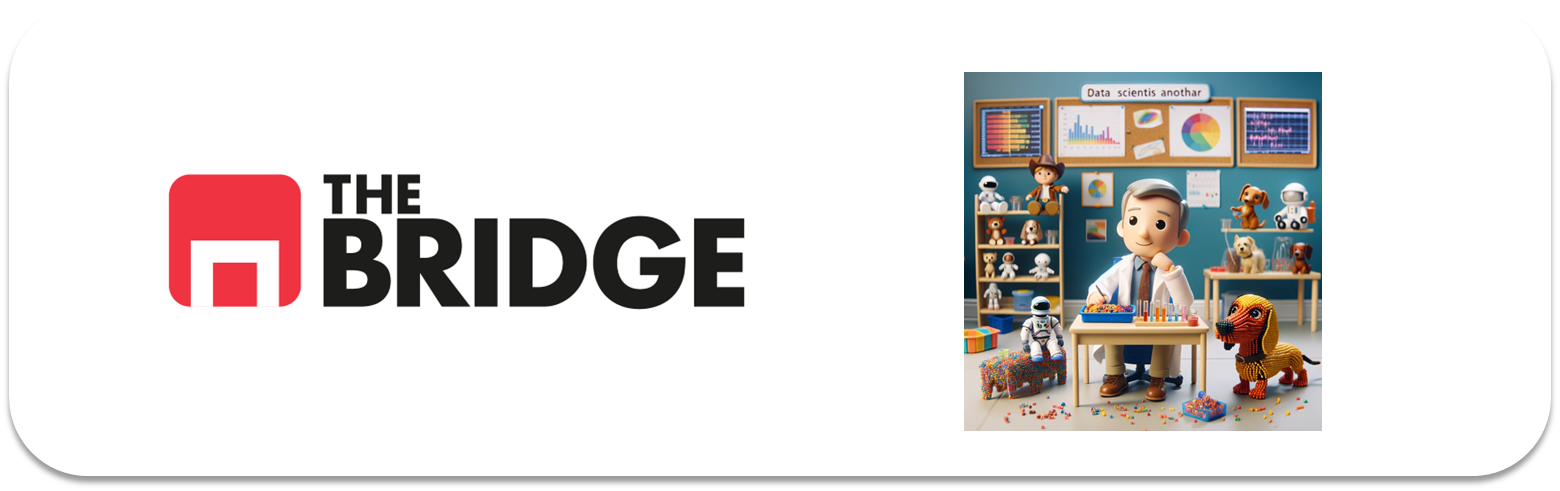

## PRACTICA OBLIGATORIA: ANÁLISIS UNIVARIANTE

* La práctica obligatoria de esta unidad consiste en hacer el análisis univariante completo de un dataset con el que acabarás muy familiarizado, el manifiesto de pasajeros del Titanic. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook. Te dejo una que vas a necesitar sí o sí

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### #1 Preparación


### #1.1


Carga en un dataframe los datos del titanic a partir de un dataset de seaborn. Para ello:

* ejecuta ```python sns.get_dataset_names()```
* localiza el nombre que puede ser el adecuado para el ejercicio
* Asigna la salida de ```sns.load_dataset(<nombre_del_dataset>)``` a una variable "df_titanic"

In [49]:
archivo = pd.read_csv(r'C:\DATA_SCIENCE\MASTER DATA SCIENCE\Prácticas Máster Data Science\Practicas_Data_Science\Prácticas Python\Ejercicios Sprint 7 - Análisis explicativo y descriptivo\Unidad_01\Practica_Obligatoria\data\titanic.csv')

df_titanic = archivo.copy()

### #1.2

Muestra una porción del dataset ("df_titanic") y su info general. ¿Hay nulos?

In [51]:
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [52]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


### #1.3

Obtén el porcentaje de nulos y decide que hacer con las columnas con nulos y ejecútalo. Además deshazte de la columna "parch" que no la emplearemos.

In [77]:
porcentaje_nulos = df_titanic.isnull().sum()/len(df_titanic)*100
porcentaje_nulos

survived       0.0
pclass         0.0
sex            0.0
age            0.0
sibsp          0.0
fare           0.0
embarked       0.0
class          0.0
who            0.0
adult_male     0.0
embark_town    0.0
alive          0.0
alone          0.0
dtype: float64

In [ ]:
df_titanic['age'].mean() # Saber la media de la columna 'age'

df_titanic['age'].fillna(df_titanic['age'].mean(), inplace=True) # Rellenamos los NaN con la media de la columna.

df_titanic['age'].info() # Comprobamos que ya no hay nulos en la columna 'age'.

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: age
Non-Null Count  Dtype  
--------------  -----  
891 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB


C:\Users\Joaquín\AppData\Local\Temp\ipykernel_17016\2669328180.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_titanic['age'].fillna(df_titanic['age'].mean(), inplace=True)


In [ ]:
df_titanic['embarked'].mode() # Sacamos la moda de la columna 'embarked'.count

df_titanic['embarked'].fillna(df_titanic['embarked'].mode()[0], inplace=True) # Cambiamos los NaN por la moda y cogemos el primer valor con 0.

df_titanic['embarked'].info() # Comprobamos que se ha cambiado correctamente,ç.

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: embarked
Non-Null Count  Dtype 
--------------  ----- 
891 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB


In [75]:
df_titanic.drop(columns=['parch'], inplace=True) # Eliminamos la columna 'parch', por no usar.

df_titanic.drop(columns=['deck'], inplace=True) # Eliminamos la columna 'deck' por tener un 77% de nulos. No tiene suficiente muestra de valor para
# poder utilizar en datos.

In [76]:
df_titanic['embark_town'].mode() # Sacamos la moda de la columna 'embark_town'. En este caso 'Southampton'.

df_titanic.fillna(df_titanic['embark_town'].mode()[0], inplace=True) # Cambiamos los NaN por la moda.

df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          891 non-null    float64
 4   sibsp        891 non-null    int64  
 5   fare         891 non-null    float64
 6   embarked     891 non-null    object 
 7   class        891 non-null    object 
 8   who          891 non-null    object 
 9   adult_male   891 non-null    bool   
 10  embark_town  891 non-null    object 
 11  alive        891 non-null    object 
 12  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(3), object(6)
memory usage: 78.4+ KB


### #1.4
Sobre el dataset "limpio". Rellena la tabla de descripción (muy breve) de lo que es cada columna en función de su nombre y los valores. Para ayudarte:
* Se trata del dataset que reune lo más parecido a un manifiesto de supervivientes y fallecidos en el viaje.
* sibsp: Es el numero de familiares que viajan con la persona indicada en el manifiesto (lista de pasajeros)
* embarked: Es la incial de la letra de la ciudad donde embarcó la persona.




| Columna/Variable | Descripción |
| ---------------- | ----------- |
|  survived   | 0 para fallecido 1 para superviviente |
|  pclass   | Tipo de pasaje de los pasajeros |
|  sex  | género de los pasajeros |
|  age  | edad de los pasajeros |
|  sibsp   | número de familiares que viajan con lo que indican en el manifiesto |
|  fare  | precio del billete que pago cada pasajero |
|  embarked  | inicial de la letra de la ciudad donde embarco la persona |
|  class  | clase donde se alojan los pasajeros |
|  who  | genero de las personas  |
|  adult_male  | si la persona era hombre adulto |
|  embark_town  | ciudad de donde embarca cada persona |
|  alive  | si está vivo o no |
|  alone  | si viaja solo o acompañado |




### #1.5

Busca en internet las tres ciudades que visitó el Titanic antes de poner rumbo a su destino y llegar a alta mar. Cambia las iniciales por esos valores.

In [79]:
df_titanic['embarked']=df_titanic['embarked'].replace({'S': 'Southampton', 'C': 'Cherbourg', 'Q': 'Queenstown'})

df_titanic.head(10)



,survived,pclass,sex,age,sibsp,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.000000,1,7.2500,Southampton,Third,man,True,Southampton,no,False
1,1,1,female,38.000000,1,71.2833,Cherbourg,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.000000,0,7.9250,Southampton,Third,woman,False,Southampton,yes,True
3,1,1,female,35.000000,1,53.1000,Southampton,First,woman,False,Southampton,yes,False
4,0,3,male,35.000000,0,8.0500,Southampton,Third,man,True,Southampton,no,True
5,0,3,male,29.699118,0,8.4583,Queenstown,Third,man,True,Queenstown,no,True
6,0,1,male,54.000000,0,51.8625,Southampton,First,man,True,Southampton,no,True
7,0,3,male,2.000000,3,21.0750,Southampton,Third,child,False,Southampton,no,False
8,1,3,female,27.000000,0,11.1333,Southampton,Third,woman,False,Southampton,yes,False
9,1,2,female,14.000000,1,30.0708,Cherbourg,Second,child,False,Cherbourg,yes,False


### #2 Análisis

Sabiendo que el objetivo de nuestro análisis es hacer un estudio de la superviviencia y mortalidad en el viaje... Haz un análisis univariante completo y ordenado de las siguientes variables:
["survived","who","age","fare","class","embarked","alone"]
Nota: Si quieres añadir más, perfecto.

Separa el análisis en categóricas (incluyendo binarias) y numéricas. Muestra valores, gráficas y conclusiones/observaciones (2 o 3 por variable)

### #2.1 Categóricas

survived
0    549
1    342
Name: count, dtype: int64


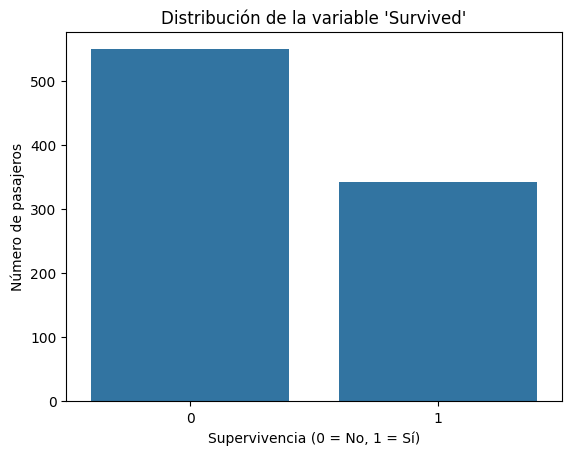

who
man      537
woman    271
child     83
Name: count, dtype: int64


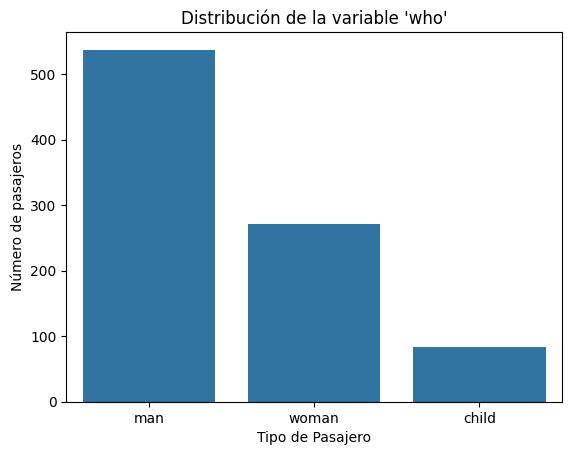

class
Third     491
First     216
Second    184
Name: count, dtype: int64


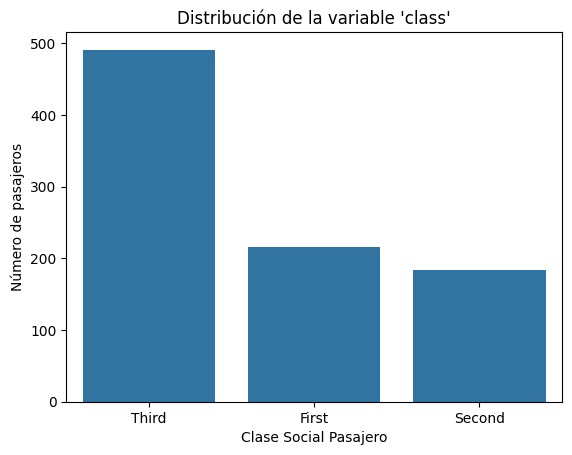

embarked
Southampton    646
Cherbourg      168
Queenstown      77
Name: count, dtype: int64


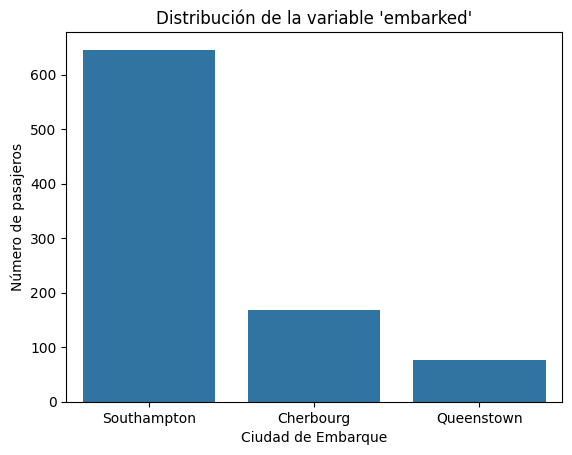

alone
True     537
False    354
Name: count, dtype: int64


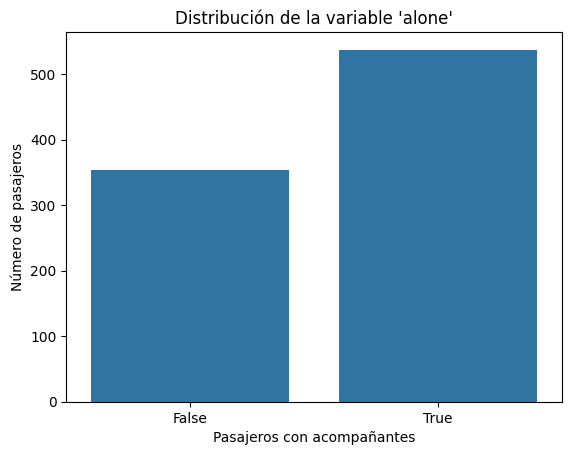

In [85]:
# Las variables categoricas son:
    # "survived" (0 = No sobrevivió, 1 = Sobrevivió).
    # "who" (hombre, mujer, niño).
    # "class" (Primera, Segunda, Tercera)
    # "embarked" (puerto de embarque)
    # "alone" (True = viajaba solo, False = viajaba acompañado).

print(df_titanic["survived"].value_counts())

sns.countplot(data=df_titanic, x="survived")
plt.title("Distribución de la variable 'Survived'")
plt.xlabel("Supervivencia (0 = No, 1 = Sí)")
plt.ylabel("Número de pasajeros")
plt.show()


print(df_titanic["who"].value_counts())

sns.countplot(data=df_titanic, x="who")
plt.title("Distribución de la variable 'who'")
plt.xlabel("Tipo de Pasajero")
plt.ylabel("Número de pasajeros")
plt.show()



print(df_titanic["class"].value_counts())

sns.countplot(data=df_titanic, x="class")
plt.title("Distribución de la variable 'class'")
plt.xlabel("Clase Social Pasajero")
plt.ylabel("Número de pasajeros")
plt.show()


print(df_titanic["embarked"].value_counts())

sns.countplot(data=df_titanic, x="embarked")
plt.title("Distribución de la variable 'embarked'")
plt.xlabel("Ciudad de Embarque")
plt.ylabel("Número de pasajeros")
plt.show()



print(df_titanic["alone"].value_counts())

sns.countplot(data=df_titanic, x="alone")
plt.title("Distribución de la variable 'alone'")
plt.xlabel("Pasajeros con acompañantes")
plt.ylabel("Número de pasajeros")
plt.show()

### #2.2 Numéricas

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: age, dtype: float64


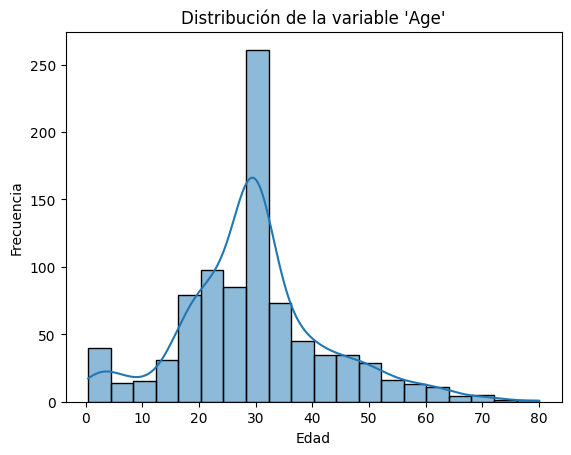

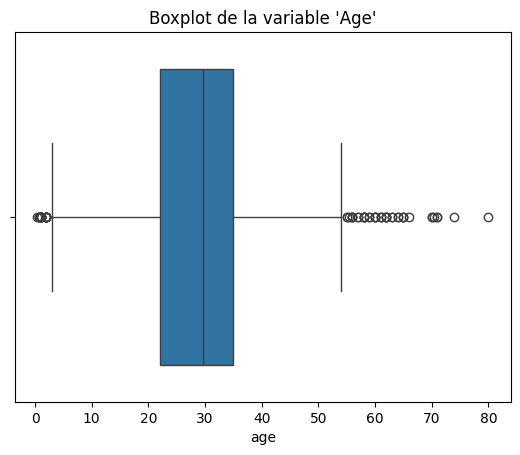

In [86]:
# Las variables númericas son:
    # "age" (edad del pasajero).
    # "fare" (precio del billete).

print(df_titanic["age"].describe())

sns.histplot(df_titanic["age"], bins=20, kde=True)
plt.title("Distribución de la variable 'Age'")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

sns.boxplot(data=df_titanic, x="age")
plt.title("Boxplot de la variable 'Age'")
plt.show()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64


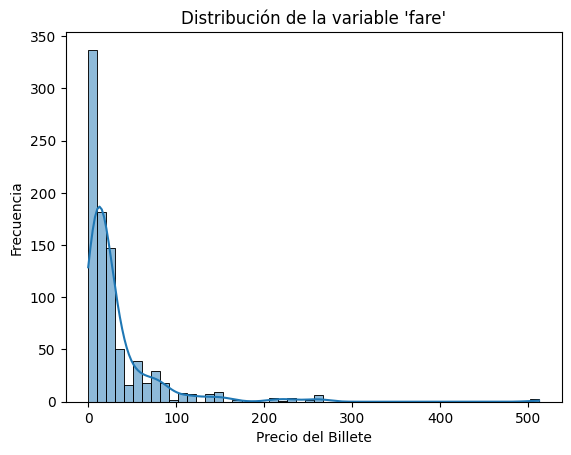

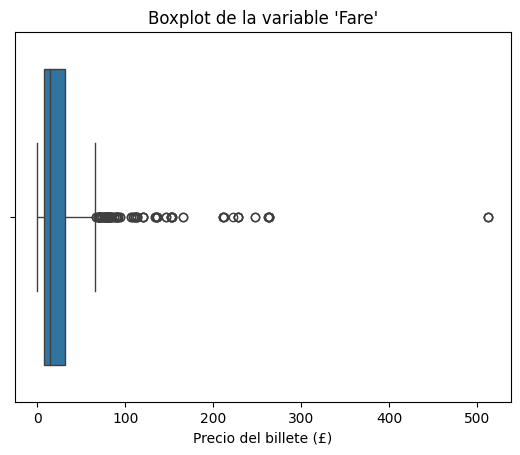

In [90]:
print(df_titanic["fare"].describe())

sns.histplot(df_titanic["fare"], bins=50, kde=True)
plt.title("Distribución de la variable 'fare'")
plt.xlabel("Precio del Billete")
plt.ylabel("Frecuencia")
plt.show()

sns.boxplot(data=df_titanic, x="fare")
plt.title("Boxplot de la variable 'Fare'")
plt.xlabel("Precio del billete (£)")
plt.show()

### **Conclusiones**

1. En la variable 'Survived' nos indica que la mayoría de pasajero no sobrevivió.
2. En la variable 'Age' nos señala que la mayoría de pasajeros tenían entre 20 y 40 años.
3. En la variable 'class', afirma que la tercera clase era la mayoritaria. Es posible que los de primera clase tuvieran más posibildiades de sobrevivir.
4. La mayoría de pasajeros pagaron menos de 50$ por el billete. Existen gran dispersión de precios, hay picos de 300$.